# 1. PCA(主成分分析法)
## 简单理解：
PCA(principal component analysis)，即主成分分析法，是一种降维方法。它的目标是通过某种线性投影，将高维的数据映射到低维的空间中表示，并期望在所投影的维度上数据的方差最大，以此使用较少的数据维度，同时保留住较多的原数据点的特性。
## 原理简析：
主成分分析的第一步是把数据标准化，即将数据每一变量减去均值，再除以方差行。标准化后的平均值变为0，方差变为1，能够保证所有变量都在同一尺度下。之后通过正交变换的方法变成若干个线性无关的新变量表示的数据。主成分分析法的任务可以理解为将所有点映射到一个超平面上（类似于三位空间里的平面，是n维空间的一个n-1维的子集），使得：
*  样本点到这个超平面的距离足够近
* 样本点在这个超平面上的投影尽可能分开
如果所有的点在超平面上的投影都很近，那么几乎所有的信息（如点和点之间的距离关系）都丢失了，而如果映射后方差尽可能的大，那么数据点则会分散开来，以此来保留更多的信息。主成分分析法先选取方差最大的坐标轴作为“第一主成分”，之后在与其正交的坐标轴中选取方差最大的作为“第二主成分”，以此类推。

# 2. 代码实现
## 使用sk-learn模型中的PCA方法：
```python
from sklearn.decomposition import PCA
# 将维度降到二维
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
```
## 求可解释方差比：
可解释方差比表示沿每个成分的数据集方差的比率，它们的和<=1。
可解释方差之和比越接近1，特征数越多，越接近原数据
```python
print(pca.explained_variance_ratio_)
```
## 特殊用法：
根据相加足够大的可解释方差比来选择要减小到的维度是一个好的方法
不需要使用复杂的代码，只需将n_coponments设置为需要的可解释方差比即可（必须是0.0-1.0之间的浮点数）
```python
pca = PCA(n_components=2)
```
# 3.样例

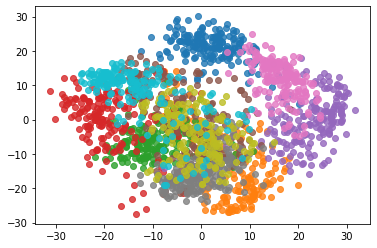

In [1]:
#导入数据集和画图函数
import matplotlib.pyplot as plt
from sklearn import datasets
# 导入PCA函数
from sklearn.decomposition import PCA
# 初始化数据
digits = datasets.load_digits()
X = digits.data
y = digits.target
# 降维到累积的可解释方差比达到0.95为止
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduction = pca.transform(X)
# 做图：描述10种类型的最显著的两个方差
for i in range(10):
     plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()

# 参考资料：
《统计学习方法》李航
《机器学习》周志华
《机器学习实战》Aurélien Géron
[https://blog.csdn.net/qq_15719037/article/details/80454113](https://blog.csdn.net/qq_15719037/article/details/80454113)

# 作业
使用PCA方法将该数据降维到可解释方差比到0.75为止

In [2]:
# 导入PCA函数
from sklearn import datasets
from sklearn.decomposition import PCA
# 初始化数据
digits = datasets.load_diabetes()
# 降维到累积的可解释方差比达到0.75为止